# Implementação da técnica de multiplicação por matriz de transformação homogênea 

# Rotation matrix

In [1]:
import numpy as np
from numpy.linalg import multi_dot

# Theta angle in degrees
T1 = 90

# Theta in radians
T1 = (T1/180.0)*np.pi

# Rotation matrix

R0 = [[np.cos(T1),0,np.sin(T1),0],[0,1,0,0],[-np.sin(T1),0,np.cos(T1),0],[0,0,0,1]]
R1 = [[1,0,0,0],[0,np.cos(T1),-np.sin(T1),0],[0,np.sin(T1),np.cos(T1),0],[0,0,0,1]]

R0_1 = np.dot(R0,R1)
R0_1

array([[ 6.12323400e-17,  1.00000000e+00,  6.12323400e-17,
         0.00000000e+00],
       [ 0.00000000e+00,  6.12323400e-17, -1.00000000e+00,
         0.00000000e+00],
       [-1.00000000e+00,  6.12323400e-17,  3.74939946e-33,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

# Displacement (Translation) Matrix

In [2]:
# Translation matrix, displacement of a in x axis, b in y axis and c in z axis
# Defining a, b and c as the Mocap origin coordinates (x0,y0,z0) in mm.
# Origin defined as the hips medium point at both the BlazePose and Mocap systems

a = 280
b = 54
c = 928

d_a = [[1,0,0,a],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
d_b = [[1,0,0,0],[0,1,0,b],[0,0,1,0],[0,0,0,1]]
d_c = [[1,0,0,0],[0,1,0,0],[0,0,1,c],[0,0,0,1]]

D0_1 = multi_dot([d_a, d_b, d_c])
D0_1

array([[  1,   0,   0, 280],
       [  0,   1,   0,  54],
       [  0,   0,   1, 928],
       [  0,   0,   0,   1]])

# Homogeneous transformation matrix

In [3]:
H0_1 = np.dot(D0_1,R0_1)
H0_1

array([[ 6.12323400e-17,  1.00000000e+00,  6.12323400e-17,
         2.80000000e+02],
       [ 0.00000000e+00,  6.12323400e-17, -1.00000000e+00,
         5.40000000e+01],
       [-1.00000000e+00,  6.12323400e-17,  3.74939946e-33,
         9.28000000e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

# CoM coordinates of BlazePose system in Mocap system coordinates 

In [4]:
data = np.load('comy.npy')

In [5]:
#import pandas as pd
import matplotlib.pyplot as plt
#import seaborn; seaborn.set()
#df = pd.DataFrame(bodycom,
#                 columns=['X', 'Y'])

bodycom_Y = data[:, 0]
bodycom_Y

array([927.4399693 , 923.65861931, 921.52430504, 925.23853699,
       926.18918421, 927.01472211, 929.24538072, 936.10155881,
       940.56681902, 944.67149196, 946.38181859, 948.98609571,
       947.1577622 , 943.50675805, 934.99199673, 929.03350427,
       921.88889007, 916.44006549, 912.7233312 , 913.66180459,
       910.42795318, 910.90707679, 915.90823851, 914.27819136,
       917.49723825, 922.7493225 , 928.40384265, 933.80975904,
       938.86604382, 938.08817307, 937.98463577, 934.97144032,
       932.00394301, 927.8012808 , 917.16366998, 903.79737202,
       903.75191088, 905.73839895])

In [4]:
# Definindo a frequência de amostragem
freq_amostragem = 30

t = np.linspace(0, len(bodycom_Y) / freq_amostragem, len(bodycom_Y))

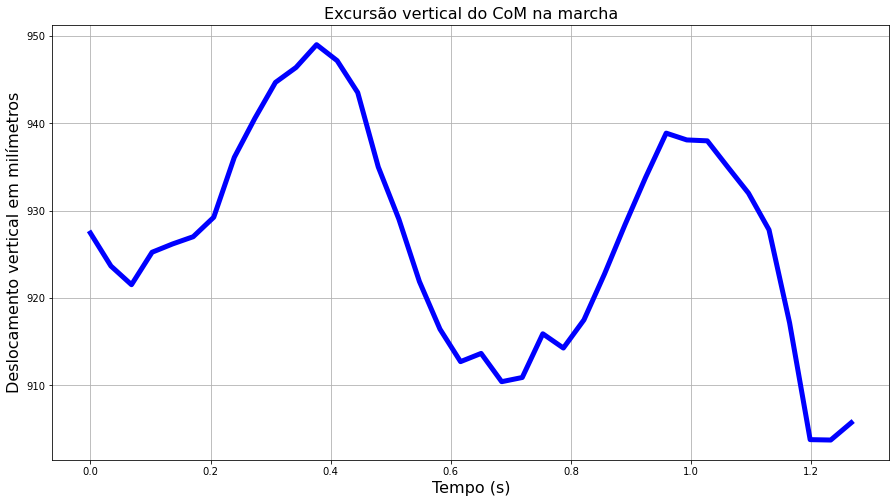

In [5]:
plt.figure(figsize=[15,8])
plt.plot(t, bodycom_Y, color = 'b', linewidth = 5)
plt.ylabel('Deslocamento vertical em milímetros', fontsize=16)
plt.xlabel('Tempo (s)', fontsize=16)
plt.title('Excursão vertical do CoM na marcha', fontsize=16)
plt.grid()
plt.show()

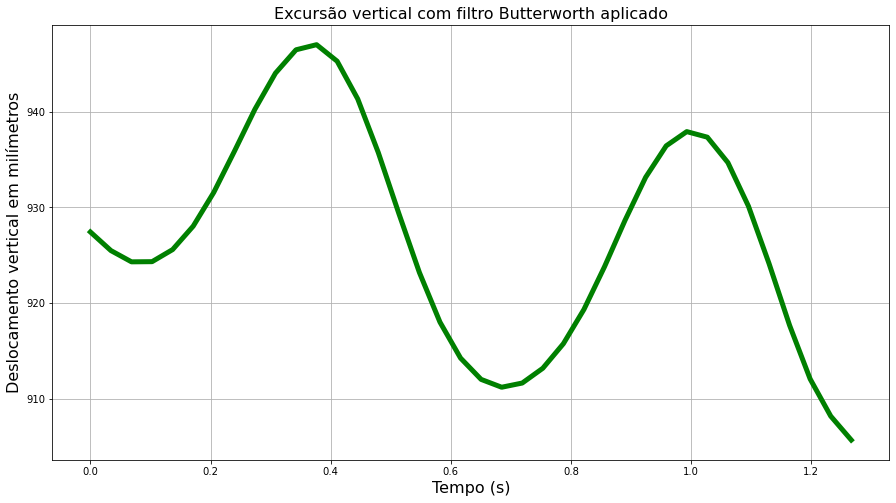

In [16]:
# apply a 2-pole lowpass filter at 0.15x Nyquist frequency (15 hz is half the max frequency of the video (30Hz))
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

x, y = scipy.signal.butter(2, 0.225)
filtered = scipy.signal.filtfilt(x, y, data, axis=0)

plt.figure(figsize=[15,8])
plt.plot(t, filtered, color = 'g', linewidth = 5)
plt.ylabel('Deslocamento vertical em milímetros', fontsize=16)
plt.xlabel('Tempo (s)', fontsize=16)
plt.title('Excursão vertical com filtro Butterworth aplicado', fontsize=16)
plt.grid()
plt.show()

In [18]:
np.array(filtered)

array([[927.44093125],
       [925.49461236],
       [924.31948641],
       [924.33762673],
       [925.60201909],
       [928.04900811],
       [931.57537762],
       [935.8550785 ],
       [940.26126577],
       [944.03708131],
       [946.47991876],
       [947.01414591],
       [945.28666413],
       [941.34667464],
       [935.74179103],
       [929.3730236 ],
       [923.20325575],
       [918.01552244],
       [914.26248857],
       [912.03415028],
       [911.2143919 ],
       [911.65268958],
       [913.19815748],
       [915.76223264],
       [919.34358154],
       [923.80653498],
       [928.66724605],
       [933.15272733],
       [936.44177039],
       [937.92965223],
       [937.34842183],
       [934.69186142],
       [930.13642362],
       [924.14579626],
       [917.68492301],
       [912.07659334],
       [908.19535444],
       [905.69622275]])

In [19]:
np.save('filt comy', filtered)